In [58]:
import pylibxc
import numpy as np
import matplotlib.pyplot as plt

def get_density(r_s):
  return 3/(4*np.pi*(r_s ** 3))

def hartree_to_mRy(energy):
  return energy * 2 * 1000

eps_c = 'zk'


In [59]:
# build functional
lda = pylibxc.LibXCFunctional("lda_c_vwn", "unpolarized")


r_s = np.linspace(0.5, 10)
r_s = np.array([0.5, 1, 2, 3, 4, 5, 6, 10])

r_s = 1
gams = np.linspace(1, 10)


# create input
inp = {}
inp["rho"] = get_density(r_s/gams)

# results in a.u.
lda_res = lda.compute(inp)


# processing
lda_res[eps_c] = np.squeeze(lda_res[eps_c])

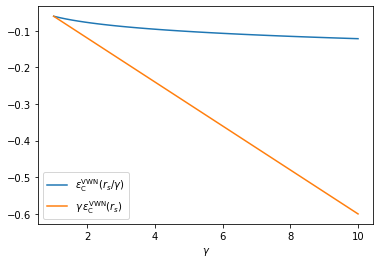

In [60]:
# plots
fig, ax = plt.subplots()

ax.plot(gams, lda_res[eps_c], label=r'$\epsilon_{\mathrm{C}}^{\mathrm{VWN}}(r_s / \gamma)$')
ax.plot(gams, lda_res[eps_c][0] * gams, label=r'$ \gamma \, \epsilon_{\mathrm{C}}^{\mathrm{VWN}}(r_s)$')

ax.set_xlabel(r'$\gamma$')
ax.legend()